<IPython.core.display.Javascript object>


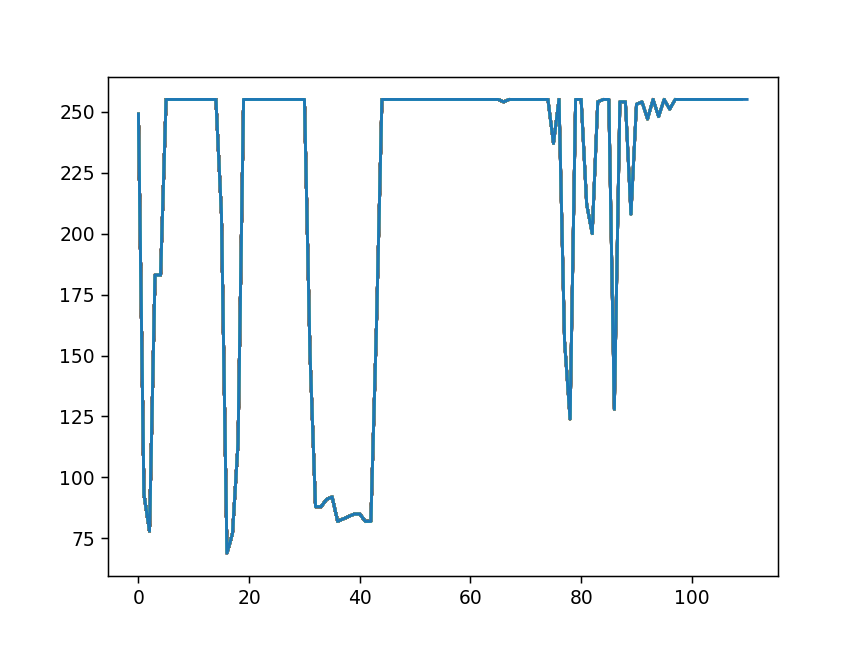

In [1]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt
from time import sleep
from datetime import date

%matplotlib notebook
plt.rcParams["animation.html"] = "jshtml"


class main():
    def __init__(self, data_iimit = 150):
        self.data_limit = data_iimit
        
        
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111)
        self.fig.show()
    
    def run_program(self):
        cv_operation()


    def cv_operation(self):
        cap = cv.VideoCapture(0)
        if not cap.isOpened():
            print("Cannot open camera")
            exit()
        
        light_data = []
        today = date.today()
        
       
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Can't receive frame (stream end?). Exiting ...")
                break
            
            gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
            cv.imshow('frame', gray)
            
            image_arr = np.array(gray)
            max_light_val = np.max(image_arr)
            light_data.append(max_light_val)
            arr_size = len(light_data)
            x_axis = [i for i in range(arr_size)]
            
            data_plot = self.ax.plot(x_axis, light_data, label = "data")
            self.fig.canvas.draw()
            
            if arr_size == self.data_limit:
                light_data.clear()
                x_axis.clear()
                plt.cla()
                

            
            if cv.waitKey(1) == ord('q'):
                break
        cap.release()
        cv.destroyAllWindows()
        
samp = main(data_iimit = 150)
samp.cv_operation()